<a href="https://www.kaggle.com/code/davidhalim2004/data-cleaning?scriptVersionId=271850197" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/davidhalim2004/data-cleaning?scriptVersionId=271617601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/davidhalim2004/data-cleaning?scriptVersionId=269113706" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Problem Formulation

## Problem Description:
This project aims to develop a machine learning model that predicts future sales
and demand by utilising historical sales data and external factors, including
product details, promotions, seasonality, holidays, and economic indicators. The
goal is to analyse historical patterns and generate reliable forecasts that help
businesses make data-driven decisions to reduce costs, increase efficiency, and
improve customer satisfaction by predicting the daily sales for the next 28 days.

## Objectives

● Collect and preprocess historical sales and demand data.

● Identify key features that influence sales trends.

● Build, train, and optimise forecasting models to predict future sales and
demand.

● Deploy the best-performing model to generate forecasts in real-time or in
batches.
## Data source:
Hierarchical sales data from Walmart, the world’s largest company by revenue in the US.



# Code setup

## Important libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

## data reading

In [2]:
data = pd.read_csv("/kaggle/input/depi-dataset/data.csv")

# Data-Analysis

In [3]:

print(data.columns.tolist())

['item_id', 'store_id', 'd', 'sales', 'date', 'wm_yr_wk', 'wday', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap', 'price_in_dollars']


In [4]:
#Top selling items
top_items = data.groupby('item_id')['sales'].sum().sort_values(ascending=False).head(10)
print("Top Selling Items:\n", top_items)

Top Selling Items:
 item_id
FOODS_3_090    1002529
FOODS_3_586     920242
FOODS_3_252     565299
FOODS_3_555     491287
FOODS_3_714     396172
FOODS_3_587     396119
FOODS_3_694     390001
FOODS_3_226     363082
FOODS_3_202     295689
FOODS_3_723     284333
Name: sales, dtype: int64


In [5]:
#Top Stores by Sales
top_stores = data.groupby('store_id')['sales'].sum().sort_values(ascending=False).head(10)
print("Top Stores by Sales:\n", top_stores)

Top Stores by Sales:
 store_id
CA_3    11188180
CA_1     7698216
TX_2     7214384
WI_2     6544012
WI_3     6427782
TX_3     6089330
CA_2     5685475
TX_1     5595292
WI_1     5149062
CA_4     4103676
Name: sales, dtype: int64


In [6]:
#Correlation between Price and Sales
corr = data[['sales', 'price_in_dollars']].corr()
print("Correlation between price and sales:\n", corr)

Correlation between price and sales:
                      sales  price_in_dollars
sales             1.000000          0.716545
price_in_dollars  0.716545          1.000000


In [7]:
#Average Sales by Day of Week
avg_sales_wday = data.groupby('wday')['sales'].mean()
avg_sales_wday

wday
1    1.362640
2    1.348968
3    1.077500
4    0.996024
5    0.984258
6    0.990653
7    1.122531
Name: sales, dtype: float64

In [8]:
#Average Sales during Event
event_sales = data.groupby('event_type_1')['sales'].mean().sort_values(ascending=False)
event_sales

event_type_1
Sporting     1.174026
No event     1.131165
Cultural     1.122819
Religious    1.107271
National     0.966170
Name: sales, dtype: float64

# Data Visualization

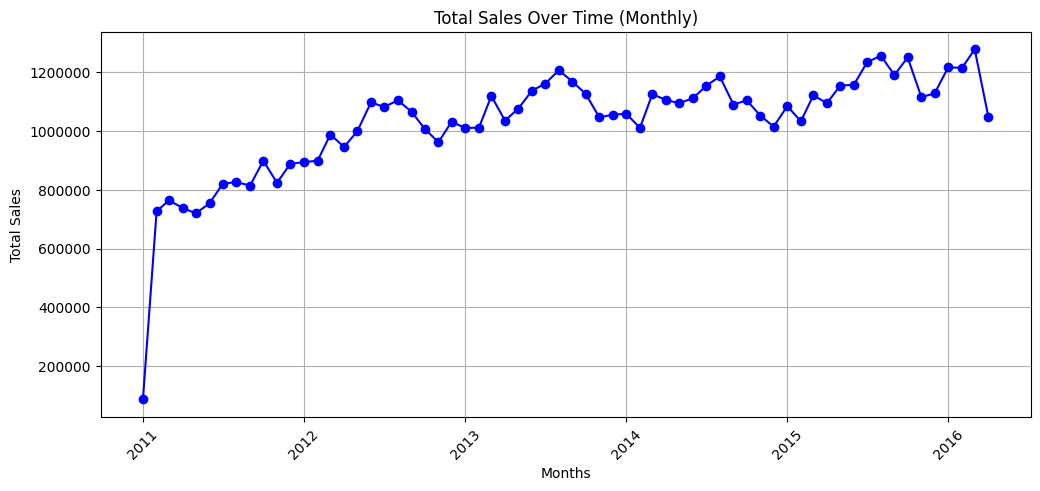

In [13]:
# trend of total sales over time
data['date'] = pd.to_datetime(data['date'])  # string -> date
monthly_sales = data.groupby(data['date'].dt.to_period('M'))['sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue')

plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Months')
plt.ylabel('Total Sales')

# Make Y-axis show real numbers (no scientific notation)
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # force plain numbers

plt.xticks(rotation=45)
plt.grid(True)
plt.show()



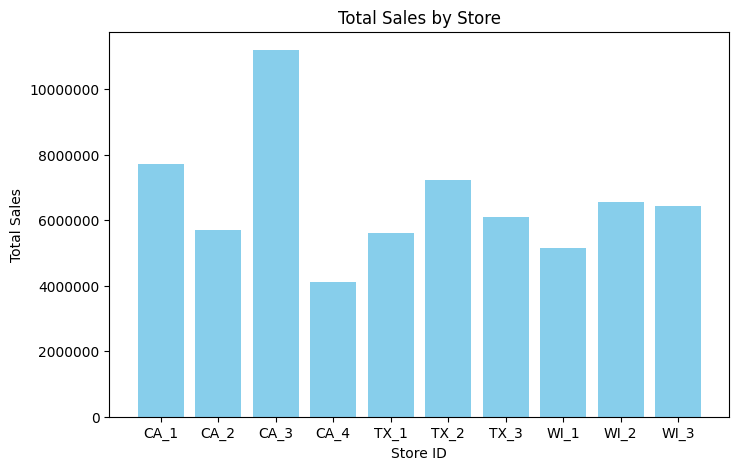

In [14]:
# which stores have the highest and lowest sales?
store_sales = data.groupby('store_id')['sales'].sum()
plt.figure(figsize=(8,5))
plt.bar(store_sales.index, store_sales.values, color='skyblue')
plt.title('Total Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')
plt.show()


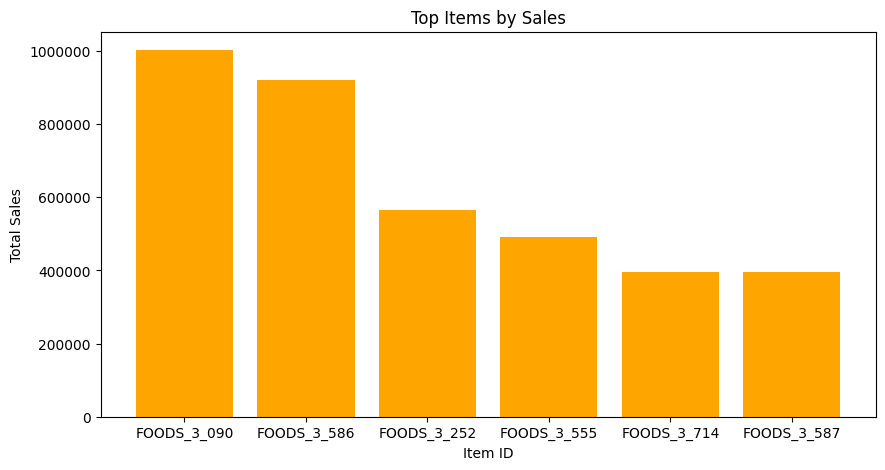

In [15]:
# Top items by sales 
item_sales = data.groupby('item_id')['sales'].sum().sort_values(ascending=False).head(6)
plt.figure(figsize=(10,5))
plt.bar(item_sales.index, item_sales.values, color='orange')
plt.title('Top Items by Sales')
plt.xlabel('Item ID')
plt.ylabel('Total Sales')
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')
plt.show()


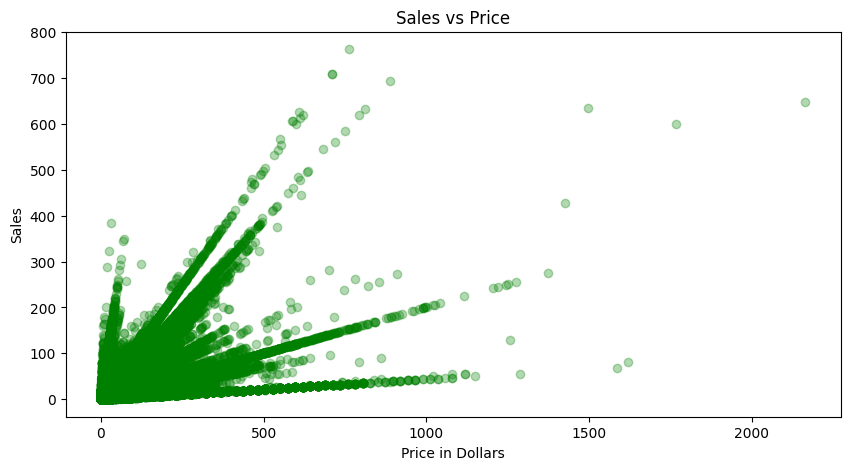

In [16]:
# Does price affect sales
plt.figure(figsize=(10,5))
plt.scatter(data['price_in_dollars'], data['sales'], alpha=0.3, color='green')
plt.title('Sales vs Price')
plt.xlabel('Price in Dollars')
plt.ylabel('Sales')
plt.show()


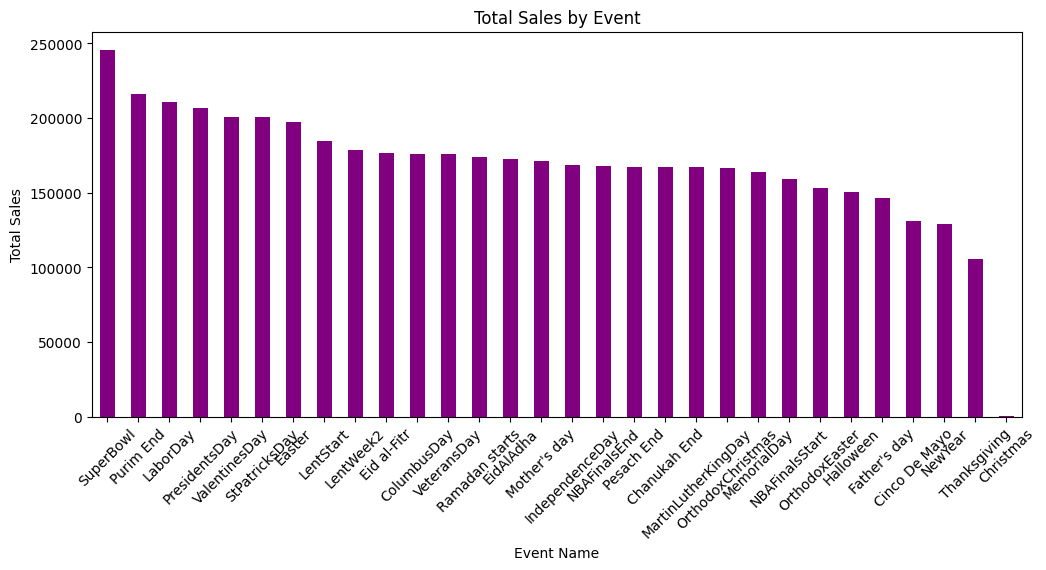

In [17]:
# Sales by event
event_sales = data.groupby('event_name_1')['sales'].sum().sort_values(ascending=False)

# Remove "No Event"
event_sales = event_sales[event_sales.index != "No event"]

# Plot
plt.figure(figsize=(12,5))
event_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Event')
plt.xlabel('Event Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


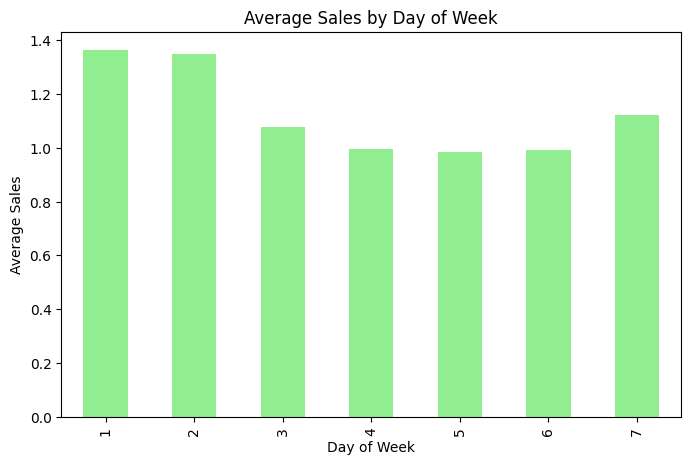

In [18]:
# Average sales by day of week
wday_sales = data.groupby('wday')['sales'].mean()
plt.figure(figsize=(8,5))
wday_sales.plot(kind='bar', color='lightgreen')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.show()


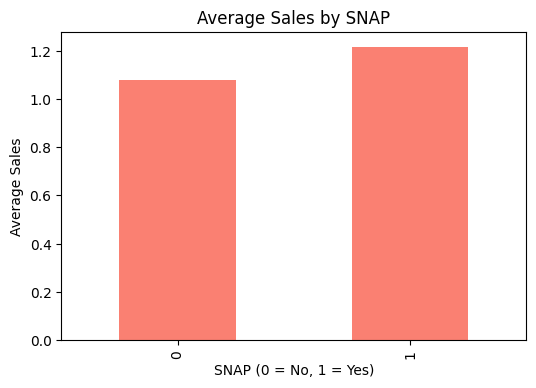

In [19]:
# Snap influence on sales
snap_sales = data.groupby('snap')['sales'].mean()
plt.figure(figsize=(6,4))
snap_sales.plot(kind='bar', color='salmon')
plt.title('Average Sales by SNAP')
plt.xlabel('SNAP (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.show()


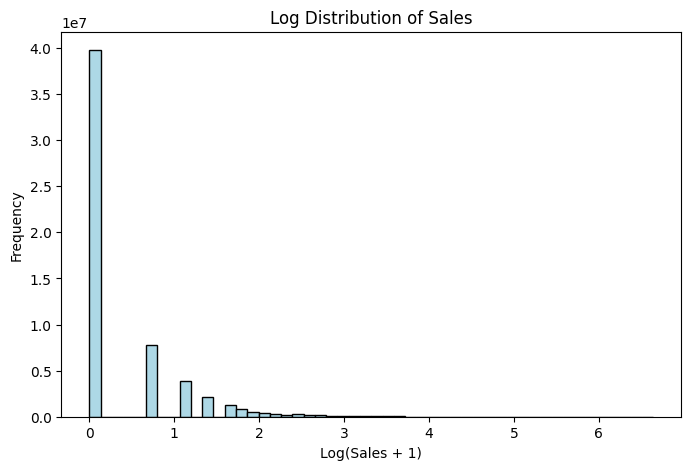

In [20]:
# sales distribution 
'''
the sales data is left-skewed...most values are very low, and only a few are very high
Note:
log transformation (log(sales + 1)) was applied to make 
the distribution clearer and reduce the effect of very large values
'''

plt.figure(figsize=(8,5))
plt.hist(np.log1p(data['sales']), bins=50, color='lightblue', edgecolor='black')
plt.title('Log Distribution of Sales')
plt.xlabel('Log(Sales + 1)')
plt.ylabel('Frequency')
plt.show()


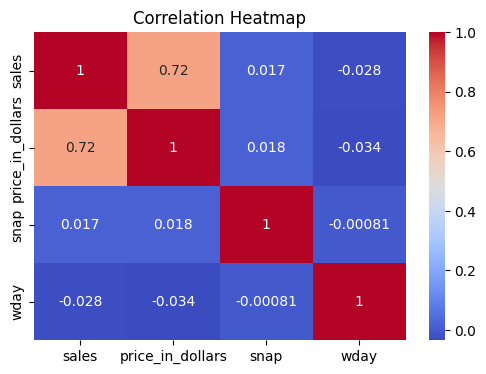

In [21]:
# heatmap shows the correlation between numerical columns
'''the heatmap shows the correlation between sales and other variables
it helps identify which factors are positively or negatively related to sales'''

corr_matrix = data[['sales', 'price_in_dollars', 'snap', 'wday']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


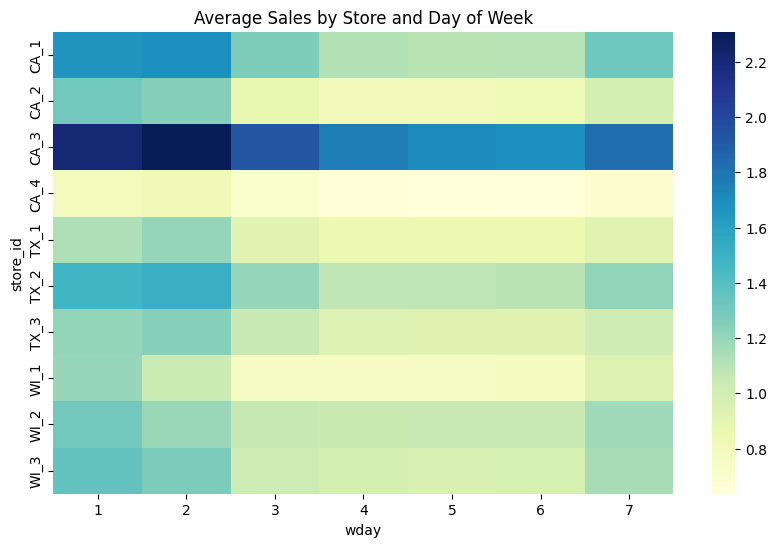

In [22]:
# average sales for each store heatmap
'''this heatmap shows the average sales for each store across different days of the week
it helps identify peak sales days for each store and patterns in weekly sales
Note:
we used a pivot table to reorganize the data so each store is a row, 
each day of the week is a column,and the cells show the average sales 
this makes it easy to create the heatmap
'''

pivot = data.pivot_table(values='sales', index='store_id', columns='wday', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Average Sales by Store and Day of Week')
plt.show()
